# Exercise 1

In this exercise, we will control a 2D drone depicted in the figure below <br>
<img src='quadrotor.png' width="300">

Consider the following simplified linear model of the drone
$$\begin{align}
    x_{n+1} = A
    x_n + B u_n
\end{align}$$

where the components of the state $x_n$ correspond to the horizontal position and velocity of the quadrotor, its vertical position and velocity and its orientation and angular velocity. The control vector
$u_n$ contains the forces produced by the rotors (our control inputs).
The module ```quadrotor.py``` defines the matrices $A$ and $B$ and code to generate a simulation of the drone.

In [11]:
## what we need to do computation and display the drone
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

import quadrotor

In [12]:
# the matrices A and B are already defined in the quadrotor module
print(f'A =\n {quadrotor.A}')
print(f'B =\n {quadrotor.B}')

A =
 [[ 1.      0.01    0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.     -0.0981  0.    ]
 [ 0.      0.      1.      0.01    0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.01  ]
 [ 0.      0.      0.      0.      0.      1.    ]]
B =
 [[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.02   0.02 ]
 [ 0.     0.   ]
 [ 0.015 -0.015]]


In [13]:
# we can display the behavior of the drone based on a given control input

# we can also start at x0 = 0 and generate a random control of 0 for 300 time steps
x0 = np.zeros((6, 1))
u = np.random.rand(2, 300)

quadrotor.animate_robot(x0, u, goal=[3, 3])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAIQ9tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EU1liIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCNT/0/dhJIzAJyZMhQHovEGSv/F3w0ijovPgSEF+f8XyAhQngyn0F6IKd/RkqYKmtWPIQQkVHrq
C7e94783CsYraD/MDtWVf9fL4FPGCyUIb/yIw70driWO22rSgsQN+97GElKO+ZSLYfvTeMkY9E33
7krU8FB+eRw0/MLPNBvKuolub1HTfuTez63BbnI6+oG6CfTlrmXe+EpEyrMhihCWZLQQLOn+y3lG
GnlN+dxkrvqSVT0E3MqZub8nEHVENNE/ib7AFnJ8bCFFu646akmpbJKTKfHxS9Nu4BJI0kjRq6Sd
9d/OAWMzxqtoFoiiOfHE5s2qlTV2WzkrDUBmImAN+qWXrePOdxj2DMfe4naB/U3Grnr+0USAYDq/
+7rNq6RF+6lgFsXXiFuAAABrgRUKWpWTBB1YU2Ob9oySKCYlUgaWLIWPYxbC/oXZ5D0Mcn0AnYdB
x5S1YyRgTJz4oXUbUQvoW94fZ0Eat5Q0CjZfsUBOXxJqOooB/uQwNDcuMlXhcqz4jn1Ri7yTLagp
UPZ35gCJbZtWLMgXmMwbstRfe3zKfBbhK1oasKRIKgsdrqa2+oUrg69960RI1Od7oJnbBui5hyRc
i0EtFbxMTm7o5ajrqt8bL6E71ASqWQb3EvSofUN4rOBZLBfaoYT6PoJpSmlBmTHkNBsHSvlirhwj
UA+aI3lqGfxJfh0Oh1qRewu+n9cWIAb/cd0wLjMbHqcqPhSgjAdwzu1t29OESyW4DS2O2UfvIQZx
wMrM6uxooCWW/A+cqzBeaHsOue8F2oypvWX1ONqAWMc4wZ3GArnpPbQ3ONnhp8p+YJjw70NkJ5oq
je8X5zA1GlcfPOIjQ5osFeQTbtSf/xTAs/x4PmG1JH7znlOoHi4DoxHfbtHuV0FizoiocW/0a/bi
gShH+DO4QHwuoA9blpyBm1kdQQDjOT3QNrT0RfN5JhvxGFFxNZCpgH1h0DThEIK7mizm3Kw41fC0
3vG4owvbm+FtvG5/ZOAbJgvKqqEU/vWYb9bhfTGagYFDCY953lu14QQE+DI0AkWncWdeYBNcxhSt
BqAsItf5TrMWz31JugAA1Elz1RJbERhCfNhrfq4gqqgpwGgTNuRpOUPQwn1puZJ+8X6Ixp/ZoIMR
KNN4YTfHiRXI0ffPfX8iznqm3+iIrhMO/HqF212EUaftbPE99r0v1m5xNQvCE8/y2fG4KC528+dP
W3iNfTIxguX7ZTB0Y9QreBz0b89NISFvykMlr1WIWLvW5ZA324xmsJBqKKNXmd2zoTsv0B8OHgss
DOB55zlOUCBP92Otb1t8I10iKn8nu2vCBTxaxeZQfGnlFjgXu3kWGrcumxxbe7Qat7ozAOnk1eoD
O+YLgUe1uS1nWSz6Nkn/B8Yi6YXxs6XoaBfB3Z1gc08ONnEkBJz5nu1H95nZb5fhQpJMq8KXylLB
277lK9648y5vtMD9aetkQlcFfYPYwM/3A5JdGXJ6x6z1g96p3lmvHdt2tK9IDDCTtUQxvtiZF5Fk
ICTZfQslfJtzcp1wBzSJUOuX8jYbBrlpoicND7nTAP0chQm7IPx/BM+bsajLliT/4oqIZUzHHWLy
Qr4Lr7ecUn3WnIXIUhTErZGUGDvxIhVXzh5yNIC/uil/0SzigWITauFszFKT2dTWs0qgaISwRUu0
KlrR48Yq/1NJ3/8WSb/vZ8vDNAIm9kODHEWJjxkqR01f5chMTV5yMXOFNNKmNgoRW+WjY/+nZgOi
0Q0pFgfB/7ETuehKHb3XdJbgsEIDrLTjOqZwLZdzYT4hsXJbAIO5Tysabf8DqMkjREfrcwwFuPAq
E6NXvuquLGF39Bb33ObTGNbXnZsSk2oTc9rf3xIQEayAq13avCMl2t2BHjhIok71/Lshd57jJoNd
CoSzpr7bF+RfIyGDKmk8QH7gULOHmOzW8CcRX/lPCW0lmEAX1l3Abvb3TorkCX6Eup1LddsxdZsf
rjkETLKPMXYHpWV87zC1fR/BRLqQ4GImnvhuLdXj1h5YVf2teTBdiGdrB6UJgCO04us9UYNBLk7I
eSc9ZK0PMKcQSl9Pq0hGl6GGKOpYJQKkwION9jun9PoLtA//3Kaz/2NOIz9CdqkuEc6Yzy5yXfSV
v+Lj6KKv2J6GIN7/6+CFOU2DFHYlxeH+9yeT97nXN99Wz3Q26XNzCugFWwUud+itgknNTFiQHv3K
YS0KzGHligipbSG645VC3hfIDvTeL3wUxuM+3l/qcBncY0k69XNQY1f9mukIxh+Sr7c2fWZYRQIl
6J+QDRCufXWgxsL480k309OaSCiGqO0P+e0QJ9pbMTjm1kuNuaZF39wYINbHJ53oWiYGyYPU8kFy
T0Q72wpqLElPJSzBGRpVbNDEZN6KhWaEhId2KiB2s1XJDujs8TU1v1cFKEa0pLCOGqaD4cvZayh0
y0/ewh/v5m4tpUMZbBAFcnglqRVXqhriQQOBZvtw4jkZv3+1GkqRWwA+Vx/jXN6eAHDpXv0L6mlq
WbiY4l+F71VtLR2Y1seMAqw+xtrdoHMQxEOekDB2E9M5an7DGS88FkTprGn0OGvYTy5Z5sGIkZJL
fyJNsULBpe4scpDzOWtRbW9RfN8X+JoOx3+jIgRUZ5tEilA10g9nHxIQ4du3W9SL8EN34zQLgEYB
/7nl6a4q4euzAPHlQpaiHjHYb+3U9+mOLx6mu0k3RGZNLhfGnStdwHopP9qUExYLEJ317bbpxUVl
6YI6DWuDdfHO483nfDPyNR+4FGoG6+Q5Jkr/6eFccVblIMYq8vMkaVypJ0LykxngclWe2dbMIRqK
w+wFyBdRm54zlS3p3xYxT

We want to generate a control input will move the drone towards the point $(3,3)$ starting from $(0,0)$. In order to
do so, we define a cost that penalizes the distance to the goal at each time step while minimizing velocities and the amount of trust needed,
i.e. we want to solve the following optimal control problem
$$\begin{align}
&\min_{x_0, u_0, x_1, u_1, \cdots} \frac{1}{2}\sum_{n=0}^{N} (x_n - x_{desired})^T Q (x_n - x_{desired}) + u_n^T R u_n\\
\textrm{subject to}\ \ & x_{n+1} = A x_{n} + B u_n\\
& x_0 = [0,0,0,0,0,0]^T
\end{align}$$
where $x_{desired} = [3,0,3,0,0,0]^T$

1. Write down the KKT conditions for the problem
2. Write code to solve the problem for N=500 time steps (you will need to find diagonal matrices $Q>0$ and $R>0$ to create a nice movement) by solving the KKT system of linear equations. Do NOT inverse the KKT matrix, instead use the [NumPy solve function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) which is numerically more stable and efficient.
4. Show plots of all the states of the robot as a function of time
5. Show plots of the optimal control as a function of time

## Solution (Series 1 Exercise 4, Scroll down for Solution of Series 2 Exercise 1)
### Cost Reformulation
Firstly, let us reformulate the cost as
$$\begin{equation}\notag
     \sum_{n=0}^{N} \left( \frac{1}{2} x_n^T Q x_n +  \frac{1}{2} u_n^T R u_n  - x_{desired}^T Q x_n\right)
\end{equation}$$

This gives us the optimal control problem, 
$$\begin{align}
    \notag \min_{x_0, u_0, x_1, u_1, \cdots} &\sum_{n=0}^{N} \left( \frac{1}{2} x_n^T Q x_n +  \frac{1}{2} u_n^T R u_n  - x_{desired}^T Q x_n\right) \\
    \notag \text{Subject to } x_{n+1} &= Ax_n + Bu_n \\
    \notag x_0 &= \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}^T \\
    \notag \text{Where, } x_{desired} &= \begin{bmatrix} 3 & 0 & 3 & 0 & 0 & 0 \end{bmatrix}^T
\end{align}$$

The problem can be rewritten in matrix form as
$$\begin{align}
\notag & \min_{y} \frac{1}{2} y^T G y + g^T y\\
\notag \textrm{subject to} \ \ \ \ & M y = p
\end{align}$$

Where, 
$$\begin{align}
    \notag &y = \begin{bmatrix} x_0 \\ u_0 \\ x_1 \\ u_1 \\ \vdots\end{bmatrix} && G = \begin{bmatrix} Q & 0 & 0 & 0 & \cdots\\ 0 & R & 0 & 0 & \cdots \\ 0 & 0 & Q & 0 & \cdots \\ 0 & 0 & 0 & R & \cdots \\ \vdots & \vdots & \vdots & \vdots & \ddots \end{bmatrix} &&& g^T = \begin{bmatrix} -x_{desired}^T Q  & 0 & -x_{desired}^T Q & 0 & \cdots\end{bmatrix} &&&& M = \begin{bmatrix} I & 0 & 0 & 0 & 0 & 0 & \cdots \\ A & B & -I & 0 & 0 & 0 & \cdots \\  0 & 0 & A & B & -I & 0 & \cdots \\  0 & 0 & 0 & 0 & A & B & \cdots \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \\ \end{bmatrix} &&&&& p = \begin{bmatrix} x_{0} \\ 0 \\ 0 \\ 0 \\ \vdots\end{bmatrix}
\end{align}
$$

### KKT Conditions
Now, we can formulate the Lagrangian as, 
$$L\begin{equation} \notag
(y,\lambda) = \frac{1}{2} y^T G y + g^T y + \lambda^T (M y - p)
\end{equation}$$
and the KKT conditions for optimality are
$$ \begin{bmatrix} G & M^T \\ M & 0 \end{bmatrix} \begin{pmatrix} y \\ \lambda \end{pmatrix} = \begin{pmatrix} -g \\ p \end{pmatrix}$$

In [14]:
# Define constants
N = 500  # Number of time steps
x_dim = 6  # Dimension of state vector
u_dim = 2  # Dimension of control vector

# Define the state cost matrix Q and the control effort cost matrix R
# Penalizes state deviation
Q = np.diag([31.25, 3.125, 31.25, 3.125, 0.3125, 0.3125])
R = np.diag([0.75, 0.75])  # Penalizes control effort

# Desired state target
x_desired = np.array([3, 0, 3, 0, 0, 0])

# Construct the block diagonal matrix G composed of Q and R blocks repeated N times
QR_blocks = [block_diag(Q, R)] * N  # Each block contains Q and R
# G is a large block diagonal matrix of size (8*N, 8*N)
G = block_diag(*QR_blocks)
G = G.astype(np.float64)

# Construct the equality constraint matrix M for the system dynamics
# Initial block for the initial condition (x_0)
M = np.hstack((np.eye(x_dim), np.zeros(
    (x_dim, (u_dim + ((x_dim + u_dim) * (N - 1)))))))

# Loop through each time step to build the rest of the M matrix
for i in range(0, N-1):
    # Construct each row in M based on the dynamics x_{n+1} = A*x_n + B*u_n
    M_i = np.hstack((
        np.zeros((x_dim, (i * (x_dim + u_dim)))),  # Zero blocks before A and B
        quadrotor.A,  # The state transition matrix A
        quadrotor.B,  # The control input matrix B
        (-np.eye(x_dim)),  # Negative identity for x_{n+1}
        # Zero blocks after -I
        np.zeros((x_dim, (((x_dim + u_dim) * (N - i - 1)) - x_dim)))
    ))
    M = np.vstack((M, M_i))  # Stack each row to form the complete M matrix
M = M.astype(np.float64)
# Construct the left-hand side (LHS) matrix for the KKT system
LHS = np.vstack((np.hstack((G, M.T)), np.hstack(
    (M, np.zeros((M.shape[0], M.T.shape[1]))))))

# Construct the vector g^T, which contains the linear term in the objective function
g = np.tile(np.hstack((((-x_desired) @ Q), [0]*u_dim)), N)
g = g.reshape(g.shape[0], 1)  # Reshape to a column vector
g = g.astype(np.float64)

# Construct the vector p, which contains the initial state and zeros for the constraints
p = np.zeros(((x_dim*N), 1))
p = p.astype(np.float64)

# Construct the right-hand side (RHS) vector for the KKT system
RHS = np.vstack((-g, p))

# Solve the linear system (LHS * [y, lambda] = RHS) to find the optimal y and lambda
res = np.linalg.solve(LHS, RHS)

# Extract the optimal states (x) and controls (u) from the solution vector
# Reshape the first 4000 elements (corresponding to x and u values) into blocks of size 8
# Extract and transpose x values to shape (6, 500)
x1 = res[:4000].reshape(-1, 8)[:, :6].T
# Extract and transpose u values to shape (2, 500)
u1 = res[:4000].reshape(-1, 8)[:, 6:].T

print('DEBUG POINT')

# Print the final state of the system
print(f"\n\nFinal State = {np.round(x1[:, N-1], 5)}")

# Print the maximum and minimum values of control input u1
print(f"U1 : Max = {round(u1[0].max(), 5)}, Min = {round(u1[0].min(), 5)}")

# Print the maximum and minimum values of control input u2
print(f"U2 : Max = {round(u1[1].max(), 5)}, Min = {round(u1[1].min(), 5)}")

# Animate the robot (quadrotor) using the computed states and controls
quadrotor.animate_robot(x1, u1, goal=[3, 3])

DEBUG POINT


Final State = [ 3.00035e+00  4.13000e-03  3.00000e+00 -0.00000e+00  4.40000e-04
  5.11000e-03]
U1 : Max = 3.21597, Min = -2.52167
U2 : Max = 26.1901, Min = -6.32256


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAALultZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ENdliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCNT/0/deNpxANBL7R6l87LmplBSGUsMQgNinSvYBoi8EPlGhxil7rIakrntmRfU0qiM0BAfkrs+
j5GFt2itzqQrfd3lpmJFXa+MNDKxweBUJBLIU/3nnkAFuR+wSGS1R3baEJNmkJtv9QkKzPL1D8ge
RrUHH6iEMmPeZXqEU9N+wdZ3pbWsr3CmKqMPW6QAPuubbXHn7oeRPpcbdx2PEb3Pjv0LQIvWJTS6
Yshbxb/waOsmEtAuFYiPugmHD0Uc6dBSOZpxtrApYbKI8CPKIfy/TrX2bfrUpEhHQzbwirKEIlUT
NdITskVOP3ljXm345J8cPx/JrUJ1COOAsTYQkvg0Md8oYnS+vnP9lhYagjUv1VaxVIXy4l9q/R/5
lafLwxIIzF0i3TYnxR/GOVzx4f7YHyii4zCO4KkAvpx/Lhe/Nvsg0F9nL3dB4zxMhxfSnummKFF+
NbpCAX3ciQo1/xoMwW5dvBfgGSrmao0oH0ZlJQm9US+xa0lm9na7Uj5V3KzpKZdeT/ewiadap6yB
bu+tH532GhBuc5uTsiA8u8QX9baYek5isvMiGJ0CfDGNgNLlsXfCuh2xc6UnKKMrLXc5/JfdQdtG
KRdLsV7BgGFndtVfqV+8Q9wuoqTyL/COR3AcvdOAYXUcGkhtyxt+rIUDi6t38WBKNnne+H9DN0Fa
dfCVEv8esh0NH13TV5ZJrLSlL14kJ1PM1NTrKrfibBYS3f95/DjoOvtaED9kPA6PpECUdWFvnwKY
d+Zl3iZrwrlay7cd733pAQOa6pJINk+VIagbqN06bis9sqc+9QNsSB5oc/Ubz2PWHone2b7SJxLP
kOZtRK8WQ3pGgEvEzKudFFPVQKxpDr+hXWz3/L1Bf9e23E7B0Valo8P2sYk4RUBO51zwkeLxMPH8
/TmBJh6nkq8mYflrgqiuGUJTKxGMblCYn3I+4303SUySVX3Xhl1enaNPyoouJrEowrusoZm2C8pb
QeeHL1qjtwlzTDzuqjcmhOZ/StUn0OI+TjQfO/Ec0xw6OMIshF0A3T13ywvUUbvSiqViKyGHlwAA
JmZ3z/d9rQHUFAAgXMq++dgK6vcnXuFIqMLoWAWmUB+trBd5JIRuAYYzhz9+vdsuL/Nxpx/3dWkv
hrNMoO9TMf5fueXbtlkEyrtvNuys9AGuo+JYEphE1bi5jspWFvX5gaxLkcYzdw34V2W81rNwRiv1
EMP0t1AhnId15J3xBUpE36gevvvz1Uylv6b9a+Xy0Re+UM9eedtWUfld7BH2oevxSsgfDa1l4HLK
UcCbR3aMGwDvSZcoF+QclFTArG7Yy6/HKlMPs8F+WI8L2sT18P4IoBTmcKXj4onzTu6EvhaYtisQ
uY+ytAtjgoBxf84BvOizEoUoXHx0IVDl1RLps5FCLLjWGbKY13JOlVIlhodY60xP9whHNNx4/n27
2615E0gOjYwem0lalCcI24xEKIPsrN6KXNyTaknocSX2+dSDn0S5m2d8DGuAAZb+mf+JkMQqiikB
tvjCSPhOVtCVmgzAAADxNwSEKNojsAAAyaqdQDHsSDRc6r5XFij7PAYDO9rS9ER8zaRhUgJJLfCm
0U+VpLL2csp4gvapV669/XxQGjWSheHFKXQDO62HOC6RhqPPcfvTvx/ioXKKdWFEzrGZN/E4uv7k
pCgmjWQH5fr8y5763YN75bnDSGzEHq+li+1c7FmG5TgZyK65i0RT2lavdE6ik8cj7jFmFkyVQrmN
LJzALJhsL5S2xyKwrKFqwCazCBr8rDrujN+sxfwukgO2TsEEMO6Z9HJ/FeSELZuz5U1dGSMCvBY2
qU3McWTf/U707Ni70RmqqRwS/+3VCx4np+Xm5lZ6T32UAnH1ox4wd+ssuJT/WEIs9XksA3fiqoJs
WGAQ7rbj/yEky1Et+/rBsaAACV5ZjVIu+JwQNtysV9eJux7HFHzHkTbzM+xqDtOvawbfPp57UzSz
Dq6cs4ki5I3wn223K6tnYBT4OGMnAu23qnKj3uVXxFe1GNqRvAeknlLoUw2E5JMBU9IfngPPq53z
oZvkNBzn2DfBSO1/kGQx6Ii/g3bEiozS094rn0lc/h9St9prEy2g0W7Qm7wsDFZD74I5/rVEhwfJ
Ve7hOvU8XFUFOfbV24o9hfEadUnAmL4WiGEujo5bJKc+uCySYf8njoi5OFknI7B5m/CriU7FD6+l
90MDD/9bwfbu5e68/5PNLZL3YfWdwS8GbyiSCAsx3LlC9IaP0f7TA0GOcKrM2zbvuDFt9c5AnAsP
w67nzMhyUjZxMhcnvp+zTeFurFtn9/fTYlcb9YFEiXAPNkS180H4QuYpq4pDr0i4OBJH+ZjySewi
NVUYtY6ndAzdXkFNR3rICIRZ708Dika8/r7X1ENX0tMlV0X5/J4vVK5Qk60o+coAoiZGLGV7LhkQ
IORGn7KyCZa43+21Wo6QUa3Qtw4+nJ1krCd/4EOlekWKaZKNnJ/ut3HjsaeHzb1HvqAgoPZLW5cl
kh/Ftlo1vL8FJ10W/pACTNHSmE5rJ66jzOIMe8e1o3fVPFY4vK5OcsADR3iAJSGeJpCTD2OE5glh
7e1/nMQ2GH2DK0FsysLYtDn4NM4AcZA2K36IER5dPJuKD7VISugNpB9ZI/yR/FJRI8GffBXVD8tc
E9pZOYIucCJ8TLPCi7McziqeqbroJUl8SLoZEP8pSf95bvSq2XhR9f/JyrlBf5sAARIAHaDKmTkQ
q2HW5nN/isZaWyd3AzC9ZDrTGBVAaIGj1McVnVgIXHxQmX5zcOxUUtv7fFhvR4xa2GAInq7Ytw4t
g7/zaISGY3lcMe/UgJOCl

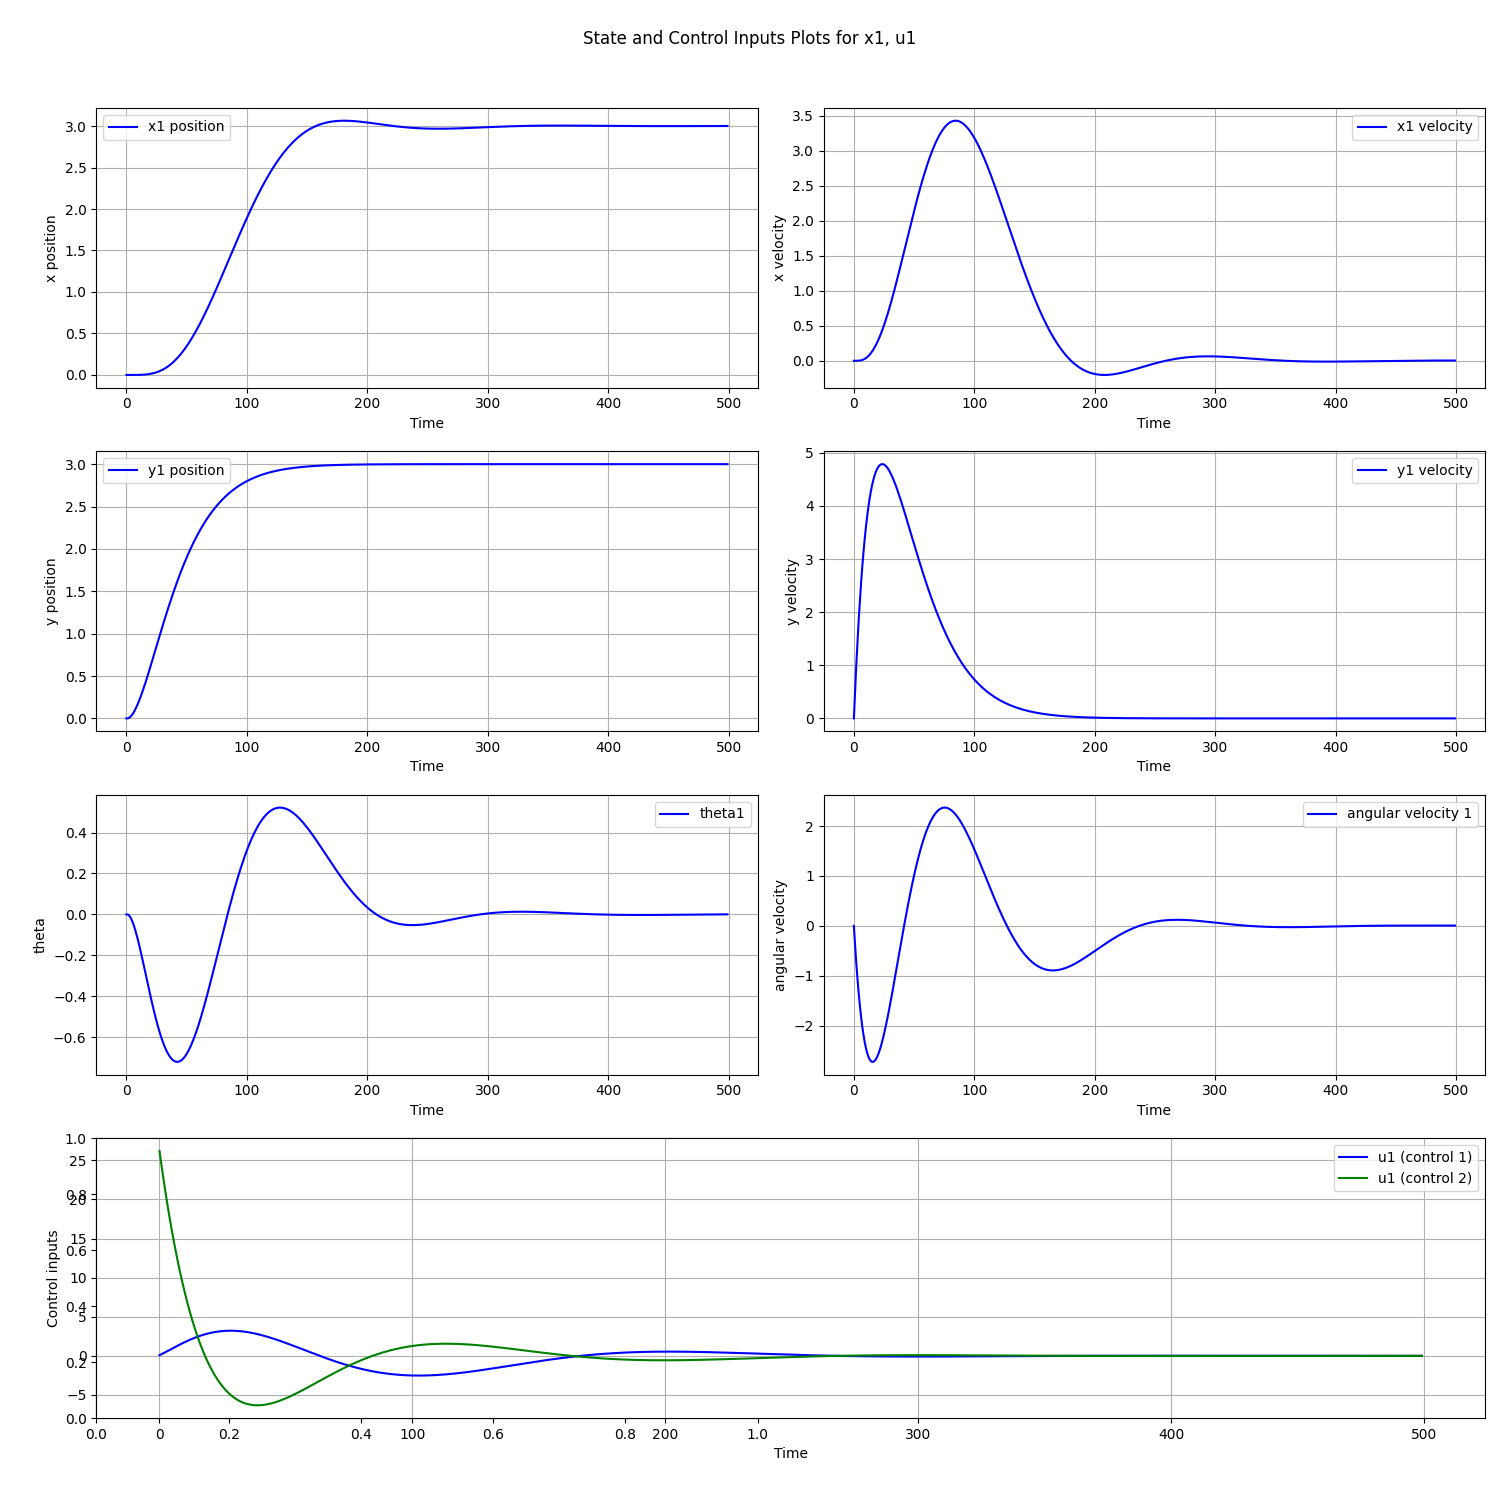

In [15]:
# Set the figure size
x_figsize = 15
y_figsize = 15
# Create a time array based on the number of columns in x1
time = np.arange(x1.shape[1])

# Create a single figure with a 4-row, 2-column layout
fig, axs = plt.subplots(4, 2, figsize=(x_figsize, y_figsize))
fig.suptitle(f"State and Control Inputs Plots for x1, u1")

# Plot x position
axs[0, 0].plot(time, x1[0, :], label='x1 position', color='blue')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('x position')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot x velocity
axs[0, 1].plot(time, x1[1, :], label='x1 velocity', color='blue')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('x velocity')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot y position
axs[1, 0].plot(time, x1[2, :], label='y1 position', color='blue')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('y position')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot y velocity
axs[1, 1].plot(time, x1[3, :], label='y1 velocity', color='blue')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('y velocity')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Plot theta
axs[2, 0].plot(time, x1[4, :], label='theta1', color='blue')
axs[2, 0].set_xlabel('Time')
axs[2, 0].set_ylabel('theta')
axs[2, 0].legend()
axs[2, 0].grid(True)

# Plot theta velocity
axs[2, 1].plot(time, x1[5, :], label='angular velocity 1', color='blue')
axs[2, 1].set_xlabel('Time')
axs[2, 1].set_ylabel('angular velocity')
axs[2, 1].legend()
axs[2, 1].grid(True)

# Plot control inputs (u1) in the fourth row, spanning both columns
axs[3, 0] = plt.subplot(4, 2, (7, 8))
axs[3, 0].plot(time, u1[0, :], label='u1 (control 1)', color='blue')
axs[3, 0].plot(time, u1[1, :], label='u1 (control 2)', color='green')
axs[3, 0].set_xlabel('Time')
axs[3, 0].set_ylabel('Control inputs')
axs[3, 0].legend()
axs[3, 0].grid(True)

# Remove the unused axis in the fourth row
fig.delaxes(axs[3, 1])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Solution (Series 2 Exercise 1)

Now, we need to solve the same problem as above but given that the control is limited to $|5|$ for both rotors and the horizontal and vertical velocites are bounded to $|2|$ $m.s^{-1}$. Mathematically, this would mean, 
$$\begin{align}
    \notag & u_{min} \leq u_n \leq u_{max}  && \text{Where, } u_{min} = \begin{bmatrix} -5 & -5 \end{bmatrix}^T \quad \text{and} \quad u_{max} = \begin{bmatrix} 5 & 5 \end{bmatrix}^T\\
    \notag & x_{min} \leq x_n \leq x_{max} &&\text{Where, } x_{min} = \begin{bmatrix} 0 & -2 & 0 & -2 & 0 & 0 \end{bmatrix}^T \quad \text{and} \quad x_{max} = \begin{bmatrix} 0 & 2 & 0 & 2 & 0 & 0 \end{bmatrix}^T
\end{align}$$

The above equations can be rewritten as 
$\begin{align}
    \notag & -u_n \leq u_{min} && u_n \leq u_{max} \\ 
    \notag & -x_n \leq x_{min} && x_n\leq x_{max} 
\end{align}$

We can rewrite the above equations in matrix form as, 
$\begin{equation}
    \notag H y \leq h
\end{equation}$

Where, 
$\begin{align}
    \notag &H = \begin{bmatrix} 0 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots\\  0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & \cdots\\  0 & 0 & 0 & -1 & 0 & 0 & 0 & 0 & \cdots\\  0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & \cdots\\  0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 & \cdots\\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & \cdots\\  0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & \cdots\\  0 & 0 & 0 & 0 & 0 & 0 & 0 & 1& \cdots \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots\end{bmatrix} && y = \begin{bmatrix} x_0 \\ u_0 \\ x_1 \\ u_1 \\ \vdots\end{bmatrix} &&& h = \begin{bmatrix} 2 \\ 2 \\ 2 \\ 2 \\ 5 \\ 5 \\ 5 \\ 5 \\ \vdots\end{bmatrix}
\end{align}$

<!-- But we cannot use such constraints as they do not allow the desired position to be $(3,3)$. Thus, we must modify the state constraints to include the start and end positions,

$$\begin{align}
    \notag & u_{min} \leq u_n \leq u_{max}  && \text{Where, } u_{min} = \begin{bmatrix} -5 & -5 \end{bmatrix}^T \quad \text{and} \quad u_{max} = \begin{bmatrix} 5 & 5 \end{bmatrix}^T\\
    \notag & x_{min} \leq x_n \leq x_{max} &&\text{Where, } x_{min} = \begin{bmatrix} 0 & -2 & 0 & -2 & 0 & 0 \end{bmatrix}^T \quad \text{and} \quad x_{max} = \begin{bmatrix} 3 & 2 & 3 & 2 & 0 & 0 \end{bmatrix}^T
\end{align}$$
This ensures that the drone never goes behind the start position and will always form a trajectory in the general direction of our chosen goal.

Still, the inequality constraint is incorrect as it does not allow the drone to rotate. If the drone does not rotate, the thrust from the propellers will never be in the right direction to allow the drone to reach its goal *(This was confirmed on using the above constraints for CVXOPT and the resulting velocities never reached 0)*.
Upon observing the previous plots, we can see that the values for $\theta$ and $\omega$ have a maximum of approximately $0.5~rad$ and 2.3 $rad . s^{-1}$ and this is when $u_1$ and $u_2$ are unbounded. Thus, we can use these same bounds to constrain $\theta$ and $\omega$ of the drone. This results in the constraints, 

$$\begin{align}
    \notag & u_{min} \leq u_n \leq u_{max}  && \text{Where, } u_{min} = \begin{bmatrix} -5 & -5 \end{bmatrix}^T \quad \text{and} \quad u_{max} = \begin{bmatrix} 5 & 5 \end{bmatrix}^T\\
    \notag & x_{min} \leq x_n \leq x_{max} &&\text{Where, } x_{min} = \begin{bmatrix} 0 & -2 & 0 & -2 & -0.5 & -2.3 \end{bmatrix}^T \quad \text{and} \quad x_{max} = \begin{bmatrix} 3 & 2 & 3 & 2 & 0.5 & 2.3 \end{bmatrix}^T
\end{align}$$
This will allow the drone to rotate in either directions by $0.5~rad$ and at a max angular velocity of $2.3~rad . s^{-1}$. These bounds will never be hit as this velocity can be achieved only when the control input $u_1$ reaches a value of $25$ (Upon observing optimisation with only equality constraints). -->

Now, we shall include these constraints in our original KKT System to obtain the optimal control problem, 
$$\begin{align}
    \notag \min_{x_0, u_0, x_1, u_1, \cdots} &\sum_{n=0}^{N} \left( \frac{1}{2} x_n^T Q x_n +  \frac{1}{2} u_n^T R u_n  - x_{desired}^T Q x_n\right) \\
    \notag \text{Subject to \quad} x_{n+1} &= Ax_n + Bu_n \\
    \notag x_0 &= \begin{bmatrix} 0 & 0 & 0 & 0 & 0 & 0 \end{bmatrix}^T \\
    \notag x_{desired} &= \begin{bmatrix} 3 & 0 & 3 & 0 & 0 & 0 \end{bmatrix}^T \\
    \notag u_{min} \leq u_n &\leq u_{max}  \quad \text{Where, } u_{min} = \begin{bmatrix} -5 & -5 \end{bmatrix}^T \quad \text{and} \quad u_{max} = \begin{bmatrix} 5 & 5 \end{bmatrix}^T\\
    \notag x_{min} \leq x_n &\leq x_{max} \quad \text{Where, } x_{min} = \begin{bmatrix} 0 & -2 & 0 & -2 & 0 & 0 \end{bmatrix}^T \quad \text{and} \quad x_{max} = \begin{bmatrix} 0 & 2 & 0 & 2 & 0 & 0 \end{bmatrix}^T
\end{align}$$

The problem can be rewritten in matrix form as
$$\begin{align}
\notag & \min_{y} \frac{1}{2} y^T G y + g^T y\\
\notag \textrm{Subject to \quad}  & M y = p \\
\notag & Hy \leq h
\end{align}$$

Where, 
$$\begin{align}
    \notag &y = \begin{bmatrix} x_0 \\ u_0 \\ x_1 \\ u_1 \\ \vdots\end{bmatrix} && G = \begin{bmatrix} Q & 0 & 0 & 0 & \cdots\\ 0 & R & 0 & 0 & \cdots \\ 0 & 0 & Q & 0 & \cdots \\ 0 & 0 & 0 & R & \cdots \\ \vdots & \vdots & \vdots & \vdots & \ddots \end{bmatrix} &&& g = \begin{bmatrix} \left[-x_{desired}^T Q\right] ^ T  \\ 0 \\ \left[-x_{desired}^T Q\right] ^ T \\ 0 \\ \vdots\end{bmatrix} &&&& M = \begin{bmatrix} I & 0 & 0 & 0 & 0 & 0 & \cdots \\ A & B & -I & 0 & 0 & 0 & \cdots \\  0 & 0 & A & B & -I & 0 & \cdots \\  0 & 0 & 0 & 0 & A & B & \cdots \\ \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots \\ \end{bmatrix} &&&&& p = \begin{bmatrix} x_{0} \\ 0 \\ 0 \\ 0 \\ \vdots\end{bmatrix} &&&&&& \text{wtih $H$ and $h$ same as above} 
\end{align}
$$

We shall use the same values for Q and R as the previous time to check whether the constraints are actually being activated. So, 
$$\begin{align}
    \notag & Q = \begin{bmatrix} 31.25 & 0 & 0 & 0 & 0 & 0 \\ 0 & 3.125 & 0 & 0 & 0 & 0 \\ 0 & 0 & 31.25 & 0 & 0 & 0 \\ 0 & 0 & 0 & 3.125 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0.3125 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0.3125 \end{bmatrix} && R = \begin{bmatrix} 0.75 & 0 \\ 0 & 0.75 \end{bmatrix}
\end{align}$$

Thus, we have formulated our optimal control problem to be of the form 
$\begin{equation} \notag
    \min_{x} \quad \frac{1}{2} x^T P x + q^T x \quad \text{subject to}  \quad  Ax = b \quad Gx \leq h
\end{equation}$
And so, we can simply use the CVXOPT solver from [*qpsolvers*](https://pypi.org/project/qpsolvers/) to find the optimal solution.

In [16]:
from qpsolvers import solve_qp

# Construct the inequality constraint matrix H for the system dynamics
H = np.array([
    [0, -1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, -1],
    [0, 0, 0, 0, 0, 0, 0, 1]
], dtype=np.float64)

H = block_diag(*([H]*N))

# Construct the vector h, which contains the inequality vector
h = np.array([
    [2],
    [2],
    [2],
    [2],
    [5],
    [5],
    [5],
    [5]
], dtype=np.float64)
h = np.tile(h, (N, 1))

# Solve the quadratic programming problem using the qpsolvers library with the cvxopt solver
# G, g: define the quadratic cost function
# H, h: define the inequality constraints
# M, p: define the equality constraints
res = solve_qp(P=G, q=g, G=H, h=h, A=M, b=p, solver='cvxopt', verbose=True)

# Extract the state values (x) from the solution vector, reshape them, and transpose to shape (6, N)
# This retrieves the state variables at each time step
x2 = res[:4000].reshape(-1, 8)[:, :6].T

# Extract the control values (u) from the solution vector, reshape them, and transpose to shape (2, N)
# This retrieves the control inputs at each time step
u2 = res[:4000].reshape(-1, 8)[:, 6:].T

# Print the final state of the system (at the last time step) with rounded values for clarity
print(f"\n\nFinal State = {np.round(x2[:, N-1], 5)}")

# Print the maximum and minimum values of the first control input (u1) over all time steps
print(f"U1 : Max = {round(u2[0].max(), 5)}, Min = {round(u2[0].min(), 5)}")

# Print the maximum and minimum values of the second control input (u2) over all time steps
print(f"U2 : Max = {round(u2[1].max(), 5)}, Min = {round(u2[1].min(), 5)}")

# Animate the quadrotor using the computed state (x2) and control inputs (u2) with the desired goal position
quadrotor.animate_robot(x2, u2, goal=[3, 3])

     pcost       dcost       gap    pres   dres
 0: -1.2025e+05 -3.3311e+05  9e+05  3e+00  2e-15
 1: -1.1815e+05 -2.5523e+05  2e+05  3e-01  2e-15
 2: -1.1485e+05 -1.5527e+05  4e+04  7e-03  3e-15
 3: -1.1589e+05 -1.2061e+05  5e+03  3e-04  3e-15
 4: -1.1611e+05 -1.1685e+05  7e+02  4e-05  2e-15
 5: -1.1613e+05 -1.1657e+05  4e+02  2e-05  2e-15
 6: -1.1615e+05 -1.1624e+05  9e+01  3e-06  2e-15
 7: -1.1616e+05 -1.1618e+05  3e+01  7e-07  2e-15
 8: -1.1616e+05 -1.1616e+05  6e+00  2e-08  2e-15
 9: -1.1616e+05 -1.1616e+05  1e+00  2e-09  2e-15
10: -1.1616e+05 -1.1616e+05  8e-02  7e-11  2e-15
Optimal solution found.


Final State = [ 2.99958e+00  5.90000e-04  3.00000e+00 -0.00000e+00 -3.26000e-03
 -8.83000e-03]
U1 : Max = 4.32312, Min = -3.35495
U2 : Max = 5.0, Min = -4.32312


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAALnhtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyByMzA2MCA1ZGI2YWE2IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMSAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE4
IGxvb2thaGVhZF90aHJlYWRzPTMgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EQRliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCNT/0/deNpxANBL7R6l87LmplBSGUsMQgNinSvYBoi8EPlGhxil7rIakrntmRfU0qiM0BAfkrs+
j5GFt2itzqQrfd3lpmJFXa+MNDKxweBUJBLIU/3nnkAFuR+wSGS1R3baEJNmkJtv9QkKzPL1D8ge
RrUHH6iEMmPeZXqEU9N+wdZ3pbWsr3CmKqMPW6QAPuubbXHn7oeRPpcbdx2PEb3Pjv0LQIvWJTS6
Yshbxb/waOsmEtAuFYiPugmHD0Uc6dBSOZpxtrApYbKI8CPKIfy/TrX2bfrUpEhHQzbwirKEIlUT
NdITskVOP3ljXm345J8cPx/JrUJ1COOAsTYQkvg0Md8oYnS+vnP9lhYagjUv1VaxVIXy4l9q/R/5
lafLwxIIzF0i9izWs8BCmmZ+Q2HTLrhE5wEE9Ieu7h0yGmIARMk4L6lXc+A0XRfZy93QeM8TOoX0
p7ppihRfjW6QgF98EdsMf+XSRj/KjMIABkq5nwVGnqMykoTeqJfYtaSzeztdqR8q7lZ0lMuvJ/vZ
BCYO2tgAi5Z1EFnUsvo8mw/7W+Rv9/oRf1tph6GW1ng23hoCD5O6WSuNkY4u+FNEETH8uSK2R/mu
5z+S+6g7aMUi6XYr2DVNvhEROigroYnRtBGBPIv8I5HcBy904BhdRwaSG3OLRILLfK52i5iwelY8
73w/oZugrTr4ovc/eHF+qsTxJIGboxeLU5mYof2KWFSpy4D/51AWGNxiwgw46/r7WhA/ZDyO76RA
lHVhb58CmHvl8tA52k69f/mBPe996QEDiuqSSDkvlSGoG6jOEB6uouT3U/UDbEgeaHP1Heds8juX
3tm/EinlCjDKDYSvFkNiJnQcErOD0tadRUCsaQ6/oVrpiHy+J3/Xtw+dplBcBSlbev/ts4/y0rFZ
vdapIxbeAENlf5c/DTDFS1doMxfYM+mIt+nlCJv3Uw+tjrlZ4UZGYN7E226p2wHC4T94Aq76cJix
nK+rHlkMrWlYac1GBLrjrHdClrRQ1+ShtBoJr3yecjy4k+lg/Jd2Nv5x+TNKe4ElHswVmrpmqZCS
2GAacAAAfnv4jL/AzLmjQQACjxtMo+RdBseVOy9/v3LfQ+dOLM/56QxeXRpfsqqiXJMcDO1HXyfL
/Np3Dib4AnrJsr3FWiEPYsXcJH6E7mPO97qk/62KVIvToVpfVV6mmrcXM1ga8HQacVsKvWjdh5za
rT08BvpgQSJIhAvmyuxnpblaD8sjcDys0YNT+l//Qbz6v+hb1n28SiL3B1y8c/jNAF1yW7Eoou97
FNIHw1+6eUDTRAI30u0/rrSw7TnY1vqnWpbZF+O2L9KCvfLqaaRfliO/ca9l0y0WibvMVFUUAg3W
+UnqCdSsqTld5LTvetD2eZnxNUT5HIBcPLzr6AmtU991ic5NP+oXTRutVtqbpwY544Z+hF5rTN8z
5wJATPsmOigR1QfA1nNkdW3vxXRB8ZiIqOG9DNaFC/0MvAB2121L4VxppKH6FYPgNMYRmpTp5Sj0
N5xwCrr81UJvj1JORCB2Rj/Le8gK22ylr9oWaR+J9f5zK+WdgAAACZMzC4AEo384gvcHHjWRs6Rb
vlkkncmzEPJ0AY+jovMzW9rd+9A1FHNaQyvAIE/L2csp3avapV669/XxQGjWSllXuCUdsx5Rhzgu
kYajzgPvzAtjn4ucFLsjYstkn7/1GaB+yiiu8HfZVPE9fmXURmvemhlaIiIuoj8MHTM9XOxZhuU4
GdA7/adKCXTe/9tWzZaOR9xizCyZKoVqHAnKvCyYbC+TH30iiFcdsO/PUOLvDXw32itAdRXPJ/+/
szDzFG09CW59jgdt/2l/3Ly1L7rGjTBnuNFbNez/BGH9ec0YMRQ7ZYinTKMijkE4pvme8b+BhysK
ZfO66Dg294NsGaDD0r/UyKNnkkXV5WJmbbNWUIAAAAMAS3JCED78JkY7A7Lv05rpY3wezfGWZNvM
z7GoO4HqhZR7kQU8GXGqeR++CzWU8jeXGSCurTkGwL7ooxk4F229U5Ue8f8xCt3eJ1drjB6SeUuh
TbHjoj9wSMHplBKxg9RinHyelenUSuQGOTL/I8YFGCvNEOuJcApZ2Varg/rn8PqVvtNYmW8Wi3az
UQFgYrIffBHP9cqkMzm0klLIv2ZMPltoPcRUQP3UZnUFbRzd1R3A8hc+rqnukU7szk3R2Z7O+bsx
JsJwZXpn6B7HEYnsTtcckXO1/H3hzJV//rDwW4etNC8pP7zYsjwyom/keKiBlfwf88sNION/oumx
Qu+QEoh+0uF7osEUkeAkJvLOaU5R3q265waVT/WiGWqDzvP3dvG2PLBHTx45farG4gqFv0JP9ezR
hf45fngekGhZL2KN6AQUCSov5W8AdLKh32cuxlA/kDdR8szQKBto3yEBjWPAf/pSq781K8jTiKwU
a1S4Sp637WyhOE2G7+trLIQA10O6RZKtTF3aeHvI5S8Gz1NL8ESeiCZyWu5osKv0UXYWNkv2Rjbe
12ry+16Gxt7uOTTcEoG/auAkfzY7aPhI7w7p3gMozQL7DYW7wjRvbkZ6sQNpY7GITsijxwIBDJ79
OjeZOrvhUF/7W02J9I9X2pj7EwycqVR9Pt+bn2TJA3QJeFjj081mtw1M4dfOCM3qlJHomgtl0WpR
AS81UDonUp8ndEhxG6ddC8sprOoSQDFkhDO1M0zj90BWhRTK8qwM6lyVX+X4QfpgpzZDgyYfTspk
hGHRwzemUVg0g1Ob7BSoMnACAZdR7DlmQRPtsS9xj6AJEunRWRkzGql64Do3WFIAAAMAP7pLCpt2
Okjo8/5ZcT38OZnTW1Wye

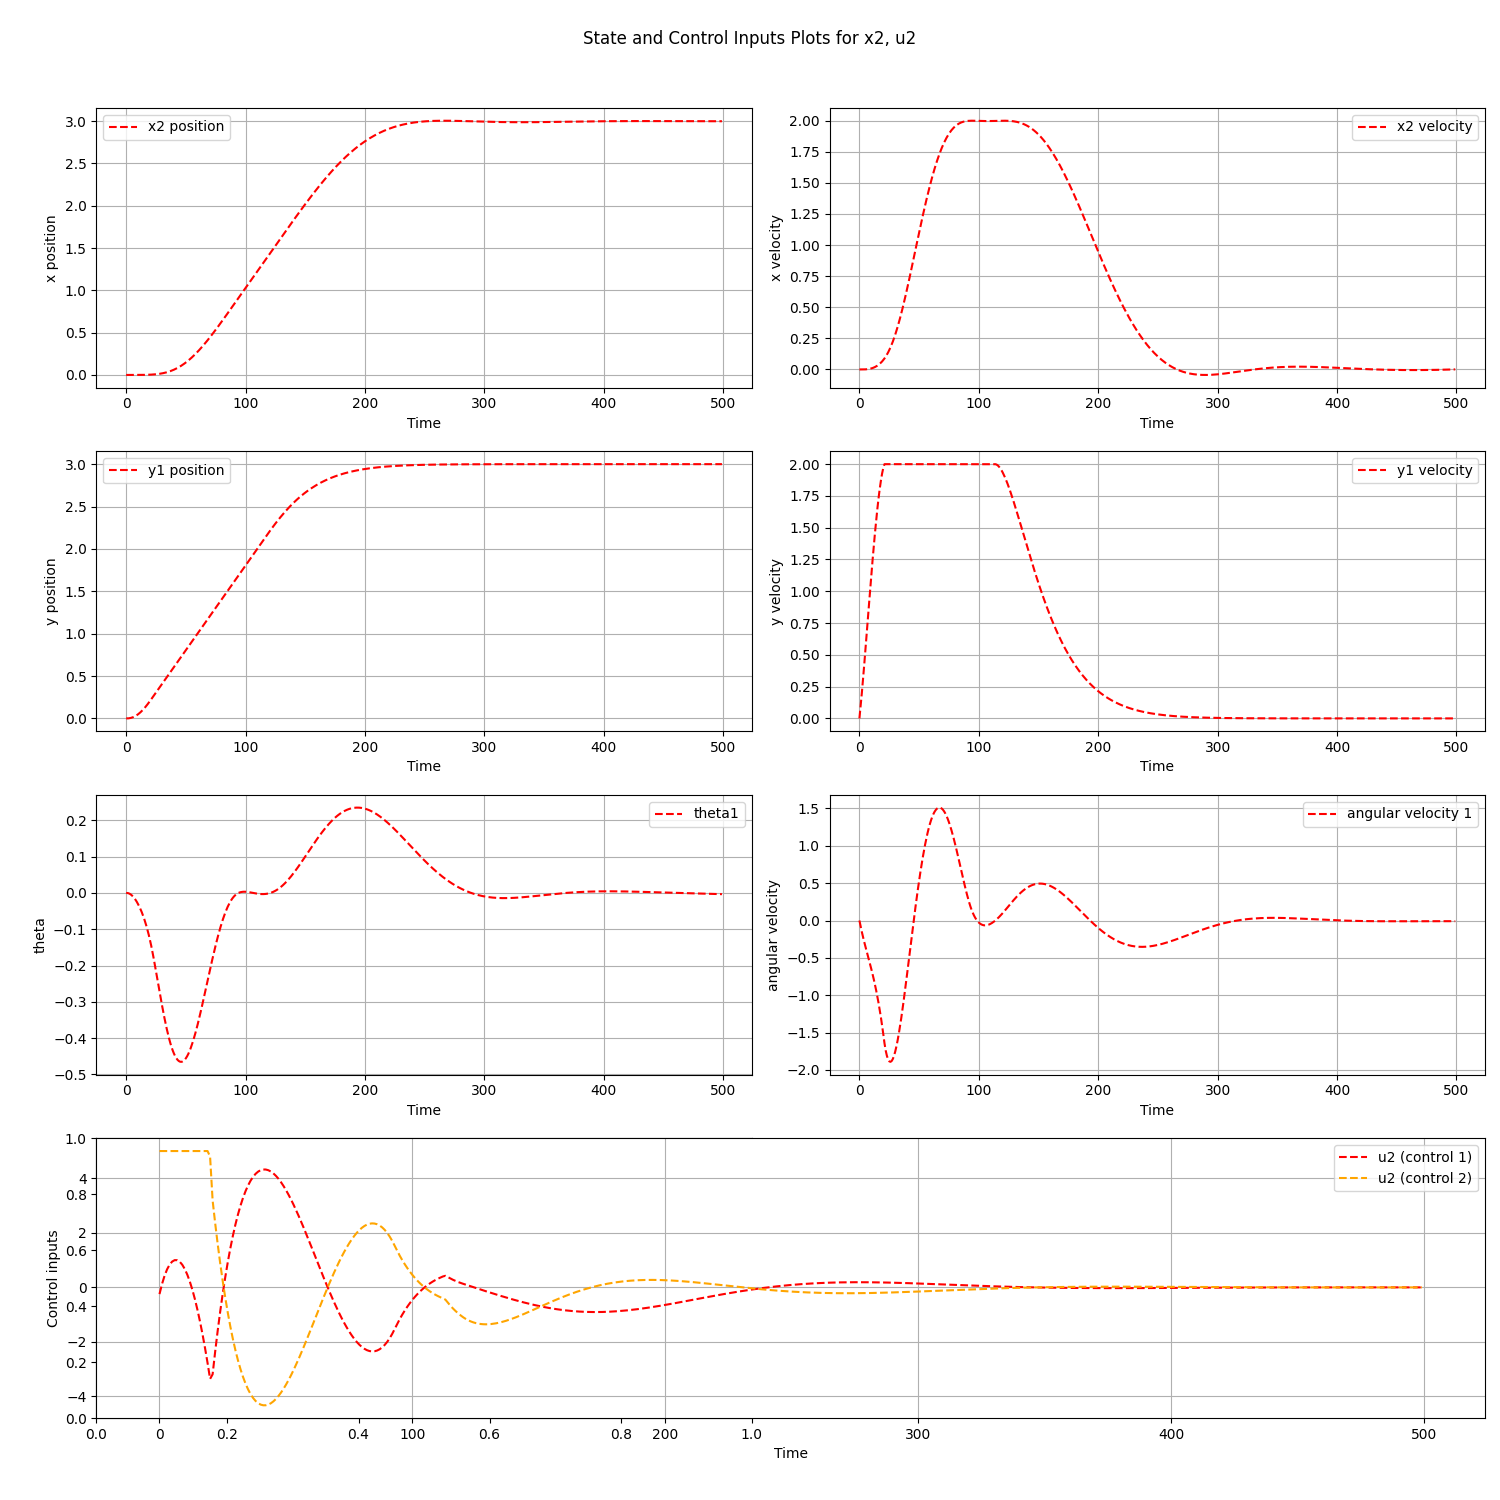

In [17]:
# Set the figure size
x_figsize = 15
y_figsize = 15
# Create a time array based on the number of columns in x2
time = np.arange(x2.shape[1])

# Create a single figure with a 4-row, 2-column layout
fig, axs = plt.subplots(4, 2, figsize=(x_figsize, y_figsize))
fig.suptitle(f"State and Control Inputs Plots for x2, u2")

# Plot x position
axs[0, 0].plot(time, x2[0, :], label='x2 position',
               linestyle='--', color='red')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('x position')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot x velocity
axs[0, 1].plot(time, x2[1, :], label='x2 velocity',
               linestyle='--', color='red')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('x velocity')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot y position
axs[1, 0].plot(time, x2[2, :], label='y1 position',
               linestyle='--', color='red')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('y position')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot y velocity
axs[1, 1].plot(time, x2[3, :], label='y1 velocity',
               linestyle='--', color='red')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('y velocity')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Plot theta
axs[2, 0].plot(time, x2[4, :], label='theta1', linestyle='--', color='red')
axs[2, 0].set_xlabel('Time')
axs[2, 0].set_ylabel('theta')
axs[2, 0].legend()
axs[2, 0].grid(True)

# Plot theta velocity
axs[2, 1].plot(time, x2[5, :], label='angular velocity 1',
               linestyle='--', color='red')
axs[2, 1].set_xlabel('Time')
axs[2, 1].set_ylabel('angular velocity')
axs[2, 1].legend()
axs[2, 1].grid(True)

# Plot control inputs (u2) in the fourth row, spanning both columns
axs[3, 0] = plt.subplot(4, 2, (7, 8))
axs[3, 0].plot(time, u2[0, :], label='u2 (control 1)',
               linestyle='--', color='red')
axs[3, 0].plot(time, u2[1, :], label='u2 (control 2)',
               linestyle='--', color='orange')
axs[3, 0].set_xlabel('Time')
axs[3, 0].set_ylabel('Control inputs')
axs[3, 0].legend()
axs[3, 0].grid(True)

# Remove the unused axis in the fourth row
fig.delaxes(axs[3, 1])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

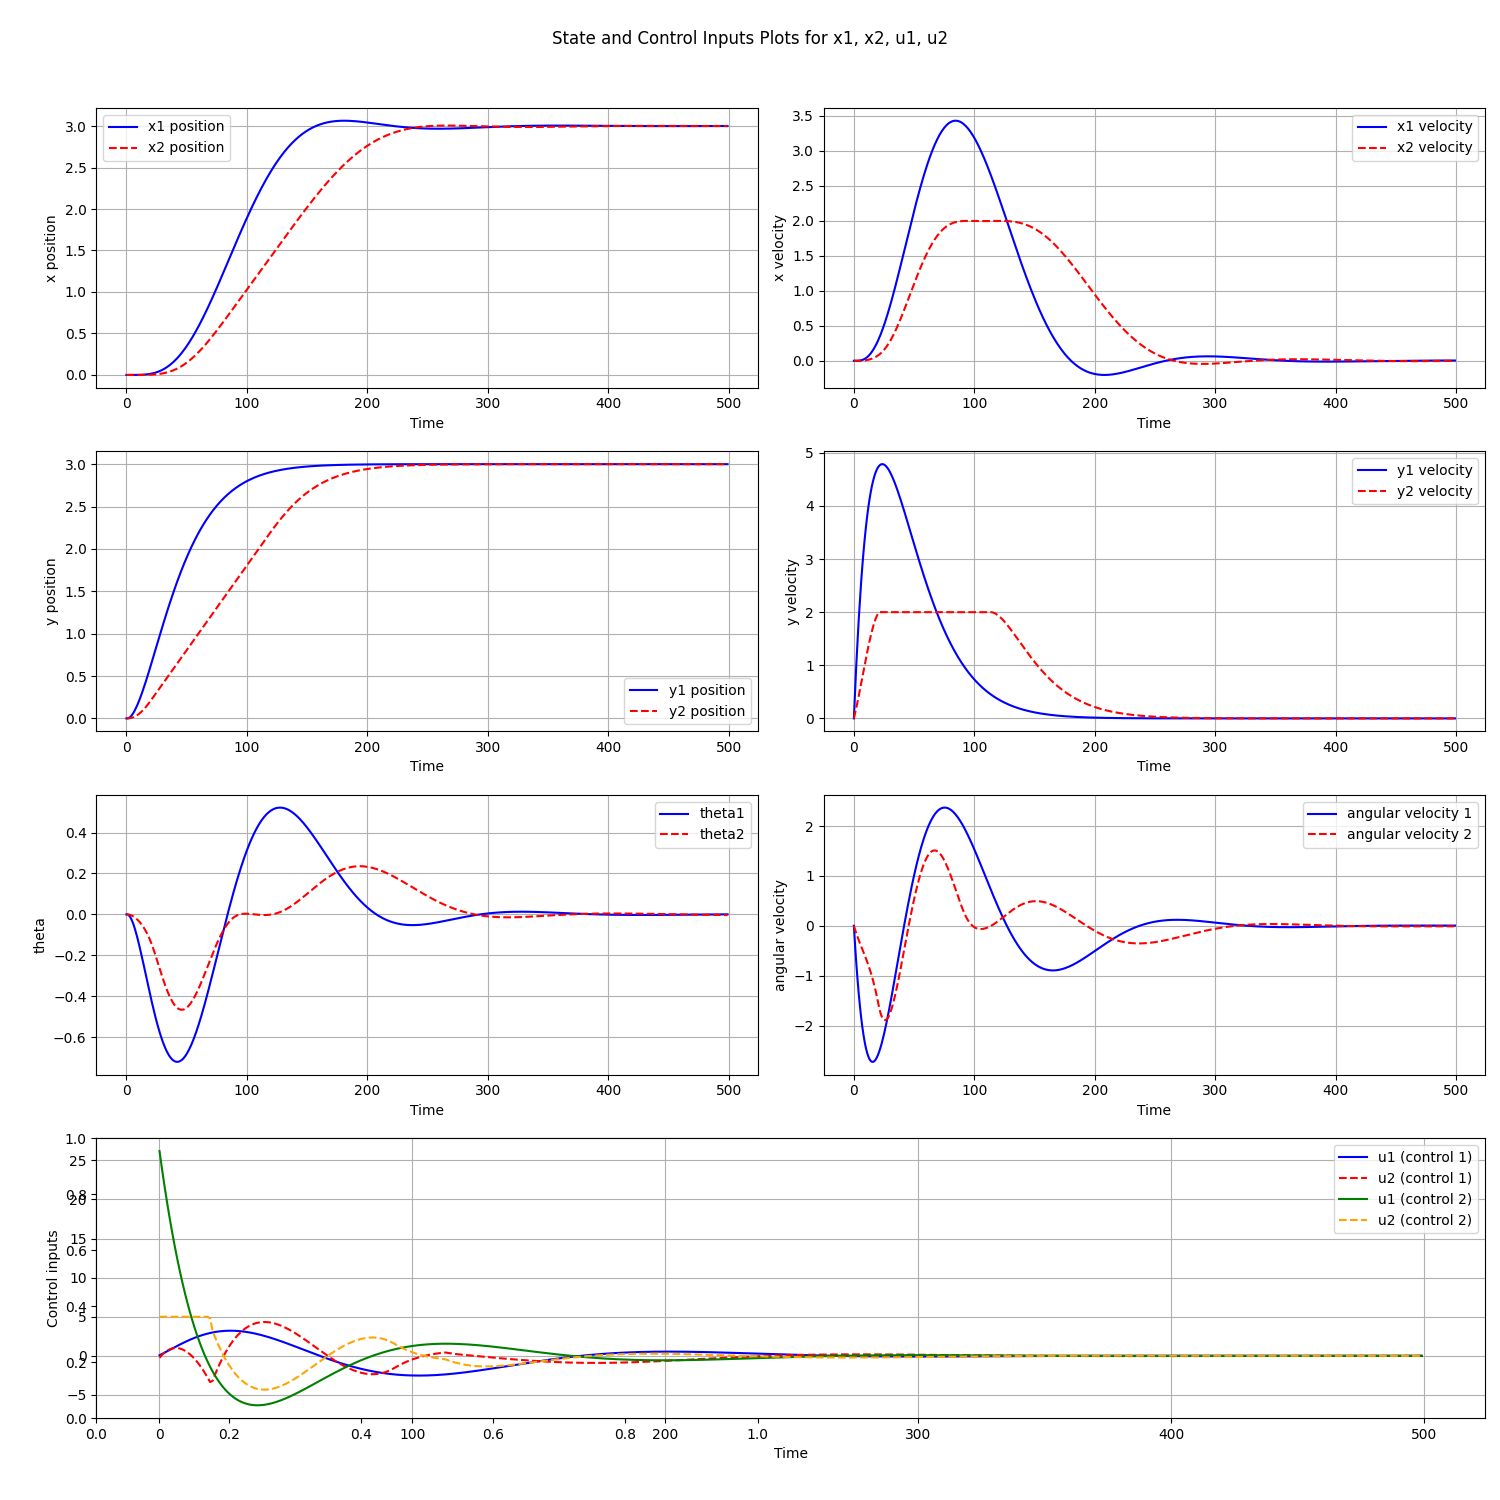

In [18]:

# Set the figure size
x_figsize = 15
y_figsize = 15
# Create a time array based on the number of columns in x1 or x2
time = np.arange(x1.shape[1])

# Create a single figure with a 4-row, 2-column layout
fig, axs = plt.subplots(4, 2, figsize=(x_figsize, y_figsize))
fig.suptitle(f"State and Control Inputs Plots for x1, x2, u1, u2")

# Plot x position
axs[0, 0].plot(time, x1[0, :], label='x1 position', color='blue')
axs[0, 0].plot(time, x2[0, :], label='x2 position',
               linestyle='--', color='red')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('x position')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot x velocity
axs[0, 1].plot(time, x1[1, :], label='x1 velocity', color='blue')
axs[0, 1].plot(time, x2[1, :], label='x2 velocity',
               linestyle='--', color='red')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('x velocity')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot y position
axs[1, 0].plot(time, x1[2, :], label='y1 position', color='blue')
axs[1, 0].plot(time, x2[2, :], label='y2 position',
               linestyle='--', color='red')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('y position')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot y velocity
axs[1, 1].plot(time, x1[3, :], label='y1 velocity', color='blue')
axs[1, 1].plot(time, x2[3, :], label='y2 velocity',
               linestyle='--', color='red')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('y velocity')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Plot theta
axs[2, 0].plot(time, x1[4, :], label='theta1', color='blue')
axs[2, 0].plot(time, x2[4, :], label='theta2', linestyle='--', color='red')
axs[2, 0].set_xlabel('Time')
axs[2, 0].set_ylabel('theta')
axs[2, 0].legend()
axs[2, 0].grid(True)

# Plot theta velocity
axs[2, 1].plot(time, x1[5, :], label='angular velocity 1', color='blue')
axs[2, 1].plot(time, x2[5, :], label='angular velocity 2',
               linestyle='--', color='red')
axs[2, 1].set_xlabel('Time')
axs[2, 1].set_ylabel('angular velocity')
axs[2, 1].legend()
axs[2, 1].grid(True)

# Plot control inputs (u1 and u2) in the fourth row, spanning both columns
axs[3, 0] = plt.subplot(4, 2, (7, 8))
axs[3, 0].plot(time, u1[0, :], label='u1 (control 1)', color='blue')
axs[3, 0].plot(time, u2[0, :], label='u2 (control 1)',
               linestyle='--', color='red')
axs[3, 0].plot(time, u1[1, :], label='u1 (control 2)', color='green')
axs[3, 0].plot(time, u2[1, :], label='u2 (control 2)',
               linestyle='--', color='orange')
axs[3, 0].set_xlabel('Time')
axs[3, 0].set_ylabel('Control inputs')
axs[3, 0].legend()
axs[3, 0].grid(True)

# Hide the unused subplot (4th row, 2nd column) as we are using only one big plot for u1 and u2
fig.delaxes(axs[3, 1])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()